# **START**

In [1]:
import pickle

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['FreeSans']})

import numpy as np

import os, sys

import plotly.express as px

from scipy.stats import gaussian_kde

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, accuracy_score, f1_score, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.gaussian_process import GaussianProcessRegressor

import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [35]:
with open('../../data21_with_label_v2.pkl', 'rb') as f:
    df21 = pickle.load(f)

df21.iloc[:, [2,3,5,10,12,14,15,17]]

,rise_time,fwhm_time,n_peaks,rise_within_1std,fwhm_within_1std,L1_norm,L1_norm_within_1std,label
0,0.2525,0.107968,1,True,True,20.769932,True,1
1,0.2900,0.202848,2,True,True,16.555586,True,0
2,0.2475,0.113017,1,True,True,21.276539,True,1
3,0.2575,0.121731,1,True,True,19.664799,True,1
4,0.2475,0.111887,1,True,True,21.636929,True,1
...,...,...,...,...,...,...,...,...
22372,0.2525,0.116832,1,True,True,20.882595,True,1
22373,0.2525,0.125569,1,True,True,20.344976,True,1
22374,0.2425,0.105388,1,True,True,22.687229,True,1
22375,0.2475,0.105995,1,True,True,21.337311,True,1


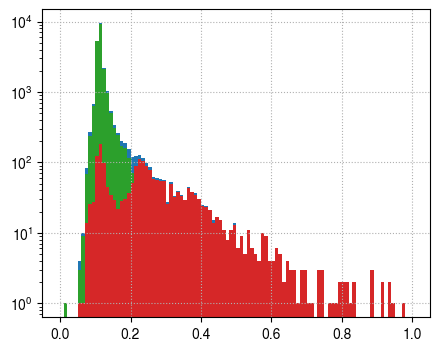

In [19]:
rise_time = df21['rise_time'].values

fig, ax = plt.subplots(figsize=(5,4))
ax.grid(ls=':')

ax.hist(df21['fwhm_time'].values, bins=100, range=(0, 1))
ax.hist(df21['fwhm_time'][df21['n_peaks'] == 1].values, bins=100, range=(0, 1), color='C2')
ax.hist(df21['fwhm_time'][df21['n_peaks'] > 1].values, bins=100, range=(0, 1), color='C3')

ax.set_yscale('log')

In [39]:
# 1. Define the good condition
good_condition = (
    (df21["rise_within_1std"]) &
    (df21["fwhm_within_1std"]) &
    (df21["L1_norm_within_1std"]) &
    (df21["n_peaks"] == 1)
)

# 2. Count how many satisfy
n_good = good_condition.sum()

# 3. Count total with label == 1
n_label1 = (df21["label"] == 1).sum()

# 4. Print comparison
print(f"Good condition count: {n_good}")
print(f"Total with label=1:   {n_label1}")
print(f"Fraction: {n_good / n_label1:.3f}")


Good condition count: 19188
Total with label=1:   19732
Fraction: 0.972
